In [1]:
#https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import re #regular expression
import string #string manipulation
import nltk #natural language toolkit for removing stopwords

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
alldata = train.append(test, ignore_index=True) #concat both train and test data

c:\users\yash patel\appdata\local\programs\python\python35\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [7]:
len(alldata)

49159

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [9]:
# remove twitter handles (@user)
alldata['tidy_tweet'] = np.vectorize(remove_pattern)(alldata['tweet'], "@[\w]*")

In [10]:
# remove special characters, numbers, punctuations
alldata['tidy_tweet'] = alldata['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [11]:
#remove short words
alldata['tidy_tweet'] = alldata['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [12]:
alldata.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [13]:
#Tokenization
tokenized_tweet = alldata['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [14]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

alldata['tidy_tweet'] = tokenized_tweet

In [16]:
alldata['tidy_tweet'].head()

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: tidy_tweet, dtype: object

In [17]:
#Understanding the common words used in the tweets: WordCloud
from wordcloud import WordCloud
all_words = ' '.join([text for text in alldata['tidy_tweet']])


In [18]:
all_words

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

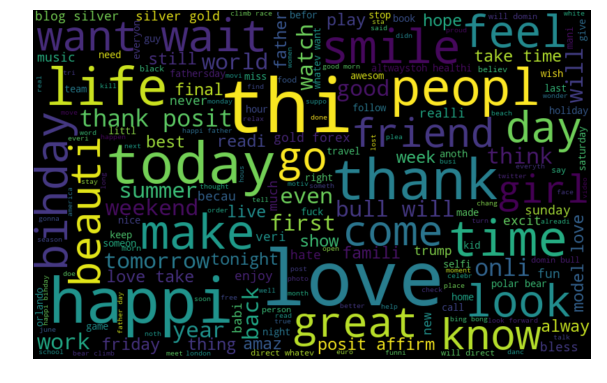

In [19]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

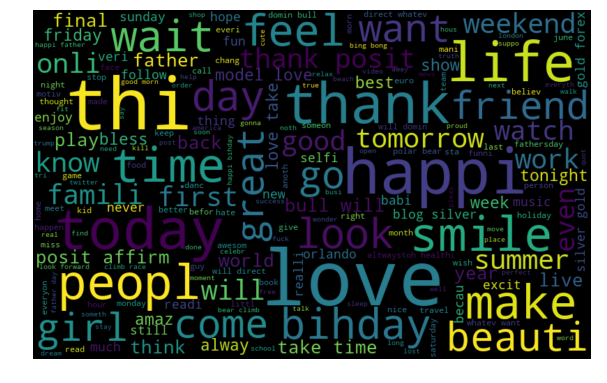

In [20]:
#Words in non racist/sexist tweets
normal_words =' '.join([text for text in alldata['tidy_tweet'][alldata['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

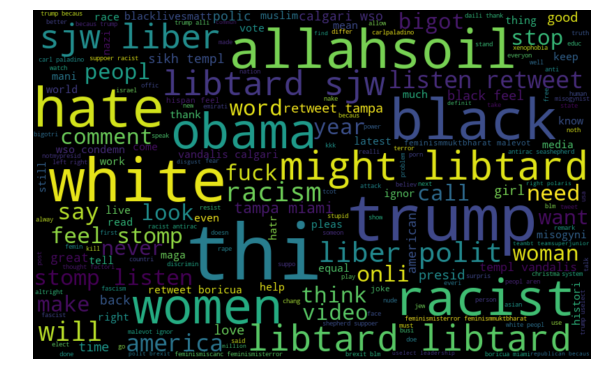

In [21]:
#Words in non racist/sexist tweets
normal_words =' '.join([text for text in alldata['tidy_tweet'][alldata['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
#Understanding the impact of Hashtags on tweets sentiment

# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [23]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(alldata['tidy_tweet'][alldata['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(alldata['tidy_tweet'][alldata['label'] == 1])

In [24]:
HT_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [25]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [26]:
HT_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

In [27]:
a = nltk.FreqDist(HT_regular)
a

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

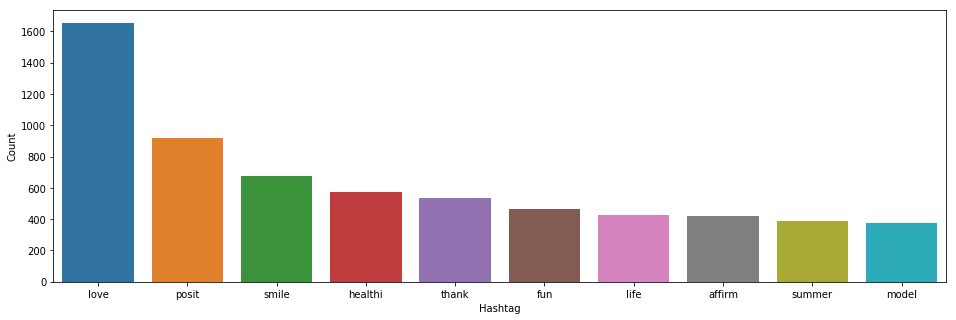

In [28]:
#Non-Racist/Sexist Tweets
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

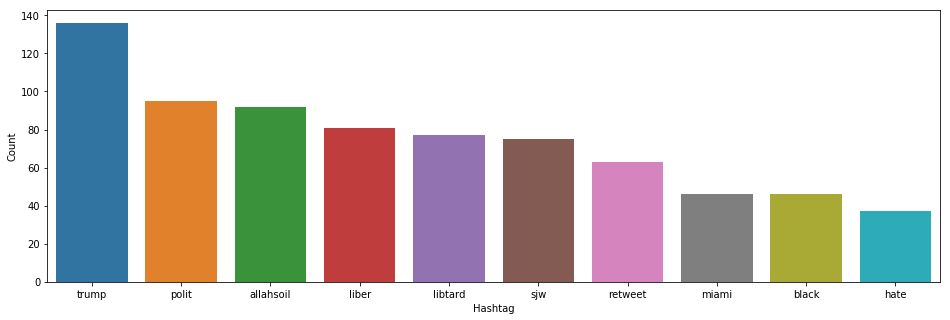

In [29]:
#Racist/Sexist Tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


In [30]:
#Extracting Features from Cleaned Tweets
#Count Vector

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(alldata['tidy_tweet'])

In [31]:
#Model Building: Sentiment Analysis
#Building model using Bag-of-Words features

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

c:\users\yash patel\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5307820299500832

In [33]:
#TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(alldata['tidy_tweet'])

In [34]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

c:\users\yash patel\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5446507515473032